## Simple siteswap editor for Jupyter to visualize and keep track of patterns

In [4]:
%matplotlib inline

In [398]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

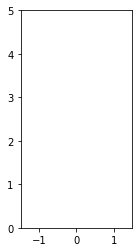

In [432]:
#def display_siteswap( code , vanilla = True ):

fig,ax = plt.subplots(figsize=(2,4))
ax.set_ylim([0,5])
ax.set_xlim([-1.5,1.5])
code = '97531'
vanilla = True
g = 9.81

scatter, = ax.plot([], [],'.',markersize='50')
catches = 0
maxy =0
nball = np.mean([float(i) for i in code])
if nball == int(nball):
    nball = int(nball)
if vanilla:
    hs = [(g * float(n)**2  / 100) for n in code]
    dt = 1/5
    trajectories = []
    t = np.arange(0,100,dt)
    for c in range(len(hs)):
        cm = (len(hs) - c ) * int(1 / dt) -1 # Delay by cm beats (we start animation with last ball thrown, ie steady state)
        
        h = hs[c] - g * t ** 2 / 100
        h = np.delete(h,np.where(h<0))
        h = np.flip(h)
        h = np.append(h,np.flip(h))
        if max(h) > maxy:
            maxy = max(h)
        
        
        trajectories.append(h)
    paths = [np.zeros((2*(i+1)-1)*int(1/dt)) for i in range(nball)]
    cs = np.int32(np.zeros(len(paths)))
    def init():
        scatter.set_data([],[])
        return(scatter,)
    xs = np.zeros(len(cs))
    sign = np.zeros(len(cs))
    siteswaps = np.zeros(len(cs))
    for c in range(len(sign)):
        sign[c] = 1 - np.mod(c,2) * 2
        siteswaps[c] = int(code[np.mod(c,len(trajectories))])
    def animate(i):
        global catches
        
        for c in range(len(cs)):
            cs[c] += 1
            if cs[c]  == len(paths[c]):
                cs[c] = int(0)
            if cs[c] == 0:
                paths[c] = trajectories[catches]
                siteswaps[c] = int(code[catches])
                if np.mod(siteswaps[c],2) == 1:
                    sign[c] *= -1
                catches += 1
                if catches == len(trajectories):
                    catches = 0
            xs[c] = (siteswaps[c] - dt * cs[c]) / siteswaps[c] * sign[c]
            if np.mod(siteswaps[c],2) == 0:
                xs[c] = sign[c]
        scatter.set_data(xs,[paths[c][cs[c]] for c in range(len(cs))])
        ax.set_ylim([0,maxy+1])
        return(scatter,)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200)

        

In [433]:
HTML(anim.to_jshtml(fps=15))